In [2]:
library(survival)

# KM Model with AIDS data

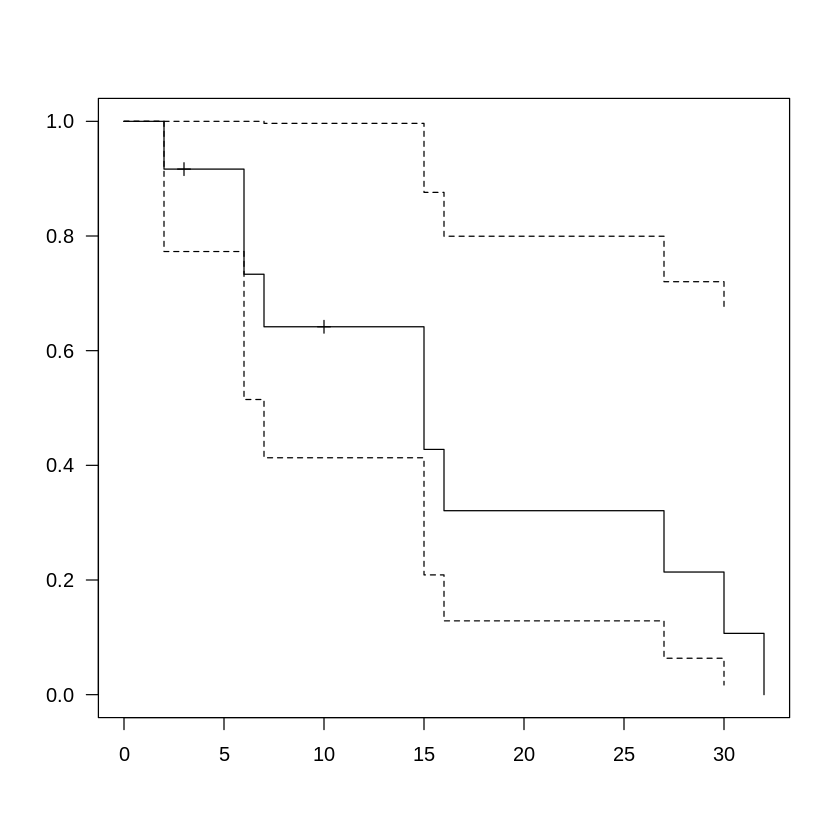

In [3]:
AIDSsurv=read.csv("survival_data1.csv")
km.model=survfit(Surv(AIDSsurv$Time,AIDSsurv$Death)~1, type="kaplan-meier")
plot(km.model,conf.int=TRUE,las=1,mark.time=TRUE)

Call:
survdiff(formula = Surv(AIDSsurv2$Time, AIDSsurv2$Death) ~ AIDSsurv2$Over40)

                    N Observed Expected (O-E)^2/E (O-E)^2/V
AIDSsurv2$Over40=0 12       10    12.84      0.63      3.83
AIDSsurv2$Over40=1  8        6     3.16      2.56      3.83

 Chisq= 3.8  on 1 degrees of freedom, p= 0.05 


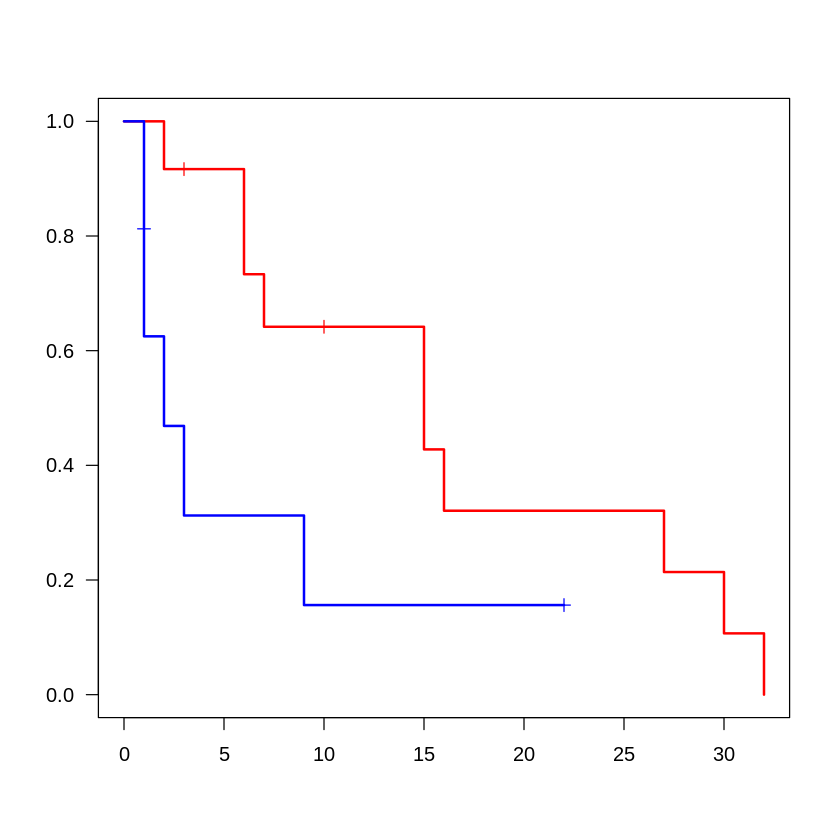

In [8]:
AIDSsurv2=read.csv("survival_data2.csv")
km.model2=survfit(
    Surv(AIDSsurv2$Time,AIDSsurv2$Death)~AIDSsurv2$Over40,
    type="kaplan-meier"
)
plot(km.model2,conf.int=FALSE,col=c("red","blue"),las=1,lwd=2,mark.time=TRUE)
sd_result=survdiff(Surv(AIDSsurv2$Time,AIDSsurv2$Death)~AIDSsurv2$Over40) # logrank test
print(sd_result)

# Cox PH Model with Stanford Heart Transplant Data

## Prepare dataset

In [15]:
MisMatchLevel<-cut(stanford2$t5, breaks=3, labels = c(0, 1, 2))
Over40<-cut(stanford2$age, breaks=c(-Inf,40,Inf), labels=c(0,1))
stan<-cbind(stanford2, MisMatchLevel, Over40)

# remove any rows that have missing values (this part important for anova)
numbermissing<-apply(stan, 1, function(x) sum(is.na(x)))
nonemissing<-numbermissing==0
Stan<-stan[nonemissing,]
colnames(Stan)=c("id","Time","Status","Age","t5","MisMatchLevel","Over40")

## Fit Cox Model on categorical variables

- For categorical variables, they will be expanded into one-hot encoding. If a categorical variable has n levels, they will be expanded into n-1 binary variables
- the log of hazard if a linear function of the covariates
- In Cox PH model, the survival function is
$$ S(t) = e^{-\lambda(t)t}$$
- The Hazard function is
$$\lambda(t)=\lambda_0(t)e^{\beta_1X_1+\beta_2X_2}$$
or 
$$\log \lambda(t) = \log \lambda_0(t) + \beta_1X_1+\beta_2X_2$$
- exp(coef) measures the ratio of the hazard function when, keep all other covariates equal, one covariate is activated (=1) compared to when its disabled (=0). exp(-coef) is ratio of the inverse.
- Concordance is like "AUC-ROC" of a classification model.

In [22]:
cox.mod=with(
    Stan,
    {
        coxph(Surv(Time,Status)~Over40+MisMatchLevel) 
    }
)
summary(cox.mod)

Call:
coxph(formula = Surv(Time, Status) ~ Over40 + MisMatchLevel)

  n= 157, number of events= 102 

                 coef exp(coef) se(coef)     z Pr(>|z|)  
Over401        0.5452    1.7249   0.2191 2.488   0.0128 *
MisMatchLevel1 0.1275    1.1360   0.2083 0.612   0.5404  
MisMatchLevel2 0.7548    2.1272   0.3896 1.937   0.0527 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
Over401            1.725     0.5797    1.1227     2.650
MisMatchLevel1     1.136     0.8803    0.7552     1.709
MisMatchLevel2     2.127     0.4701    0.9911     4.565

Concordance= 0.557  (se = 0.032 )
Likelihood ratio test= 9.31  on 3 df,   p=0.03
Wald test            = 9.38  on 3 df,   p=0.02
Score (logrank) test = 9.61  on 3 df,   p=0.02


## Fit Cox Model on continuous variables

- Interpretation of exp(coef) on continuous variables

Age has exp(coef) 1.030, this means that, keep all other things equal, if a patients' age is increased by 1 year, the hazard function will increase by 3%. Based on the definition of hazard function, this implies that the patient will be 3% more likely to die when the age is increased by 1 year. 

In [25]:
cox.mod=with(
    Stan,
    {
        coxph(Surv(Time,Status)~Age+t5) 
    }
)
summary(cox.mod)

Call:
coxph(formula = Surv(Time, Status) ~ Age + t5)

  n= 157, number of events= 102 

       coef exp(coef) se(coef)     z Pr(>|z|)   
Age 0.02961   1.03006  0.01136 2.608  0.00911 **
t5  0.17041   1.18579  0.18326 0.930  0.35243   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
Age     1.030     0.9708     1.007     1.053
t5      1.186     0.8433     0.828     1.698

Concordance= 0.59  (se = 0.034 )
Likelihood ratio test= 8.47  on 2 df,   p=0.01
Wald test            = 7.81  on 2 df,   p=0.02
Score (logrank) test = 7.87  on 2 df,   p=0.02
